In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
thyroid = pd.read_csv('hypothyroid.csv')

In [3]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
#Check whether data is inaccurate
for column in thyroid.columns:
    count = thyroid[column][thyroid[column]=='?'].count()
    if count!=0:
        print(column,count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [6]:
#Check how many percent data is missing
nan = ['age','sex','TSH','T3','TT4','T4U','FTI','TBG']
for column in nan:
    count = thyroid[column][thyroid[column]=='?'].count()
    print(f'{column} {count/len(thyroid)}')

age 0.0002651113467656416
sex 0.039766702014846236
TSH 0.09782608695652174
T3 0.20387062566277836
TT4 0.0612407211028632
T4U 0.10259809119830329
FTI 0.10206786850477201
TBG 1.0


From above it is seen that we need to remove TBG column and some unwanted column as well

In [7]:
thyroid = thyroid.drop(['TBG','TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured'],axis=1)

In [8]:
# Converting ? into nan values
for column in thyroid.columns:
    count = thyroid[column][thyroid[column]=='?'].count()
    if count!=0:
        thyroid[column] = thyroid[column].replace('?',np.nan)
    count = thyroid[column][thyroid[column]=='?'].count()
    if count==0:
        print(column,count)

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
binaryClass 0


In [9]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P


In [10]:
# Checking nan values
thyroid.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
binaryClass                    0
dtype: int64

In [11]:
# Filling nan values with median
category_1 = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for column in category_1:
    thyroid[column] = thyroid[column].fillna(thyroid[column].median())
# Filling nan values with mode
thyroid['sex'] = thyroid['sex'].fillna(thyroid['sex'].mode()[0])

In [12]:
thyroid.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
binaryClass                  0
dtype: int64

In [13]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,0.98,107.0,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,2.0,109,0.91,120,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,0.98,107.0,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,P


# Label Encoding

In [14]:
le = LabelEncoder()
l = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick',
'pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
'lithium','goitre','tumor','hypopituitary','psych','referral_source','binaryClass']
for i in l:
    thyroid[i] = le.fit_transform(thyroid[i])

In [15]:
thyroid

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,1,1
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,0.98,107.0,4,1
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,2.0,109,0.91,120,4,1
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,0.98,107.0,4,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,...,1,0,0,1.4,2.0,103.0,0.98,107.0,4,1
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,3,1
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,4,1
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,3,1


In [16]:
l = ['TSH','T3','TT4','T4U','FTI']
for i in l:
    thyroid[i] = thyroid[i].astype(np.float)

In [17]:
thyroid['age'] = thyroid['age'].astype(np.int64)

In [18]:
thyroid.dtypes

age                            int64
sex                            int32
on_thyroxine                   int32
query_on_thyroxine             int32
on_antithyroid_medication      int32
sick                           int32
pregnant                       int32
thyroid_surgery                int32
I131_treatment                 int32
query_hypothyroid              int32
query_hyperthyroid             int32
lithium                        int32
goitre                         int32
tumor                          int32
hypopituitary                  int32
psych                          int32
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral_source                int32
binaryClass                    int32
dtype: object

# Outlier Detection

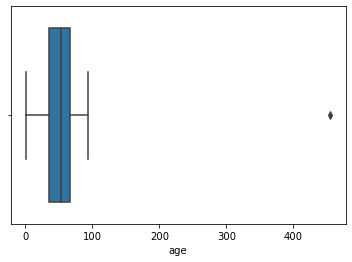

In [19]:
sns.boxplot(thyroid['age'])

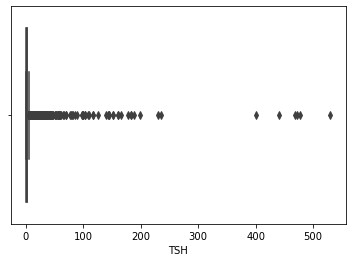

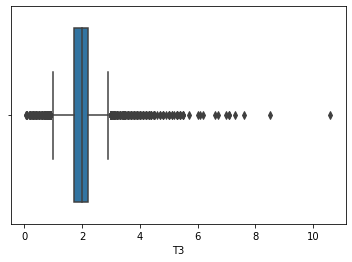

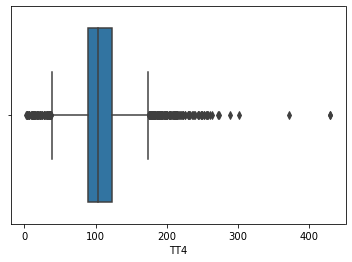

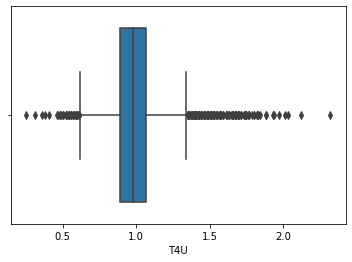

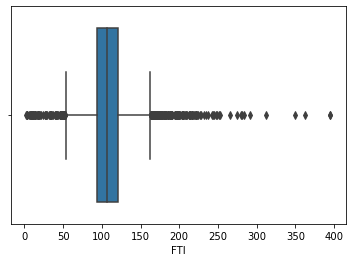

In [20]:
l = ['TSH','T3','TT4','T4U','FTI']
for i in l:
    sns.boxplot(thyroid[i])
    plt.show()

# Outlier Removal

In [21]:
thyroid = thyroid.drop(thyroid[thyroid['age']>400].index,axis=0)
thyroid = thyroid.drop(thyroid[thyroid['TSH']>50].index,axis=0)
thyroid = thyroid.drop(thyroid[thyroid['T3']>4].index,axis=0)
thyroid = thyroid.drop(thyroid[thyroid['TT4']>200].index,axis=0)
thyroid = thyroid.drop(thyroid[thyroid['T4U']>1.5].index,axis=0)
thyroid = thyroid.drop(thyroid[thyroid['FTI']>200].index,axis=0)

In [22]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3527 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3527 non-null   int64  
 1   sex                        3527 non-null   int32  
 2   on_thyroxine               3527 non-null   int32  
 3   query_on_thyroxine         3527 non-null   int32  
 4   on_antithyroid_medication  3527 non-null   int32  
 5   sick                       3527 non-null   int32  
 6   pregnant                   3527 non-null   int32  
 7   thyroid_surgery            3527 non-null   int32  
 8   I131_treatment             3527 non-null   int32  
 9   query_hypothyroid          3527 non-null   int32  
 10  query_hyperthyroid         3527 non-null   int32  
 11  lithium                    3527 non-null   int32  
 12  goitre                     3527 non-null   int32  
 13  tumor                      3527 non-null   int32

# Univariate Analysis

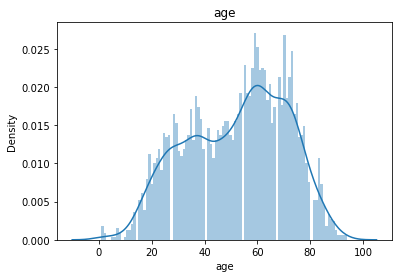

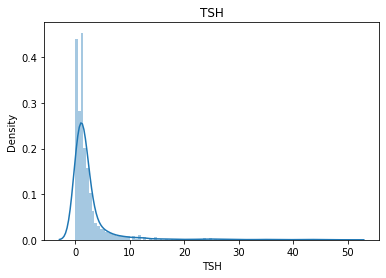

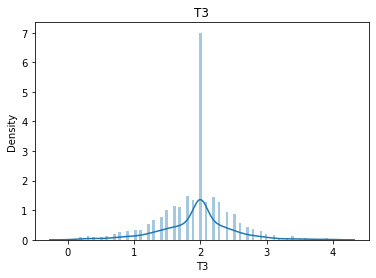

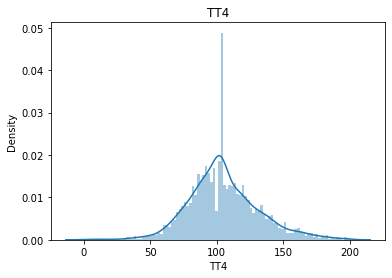

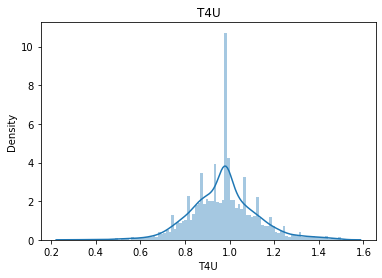

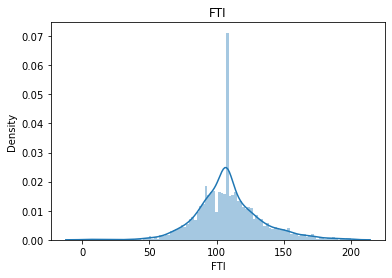

In [23]:
l = ['age','TSH','T3','TT4','T4U','FTI']
for i in l:
    sns.distplot(thyroid[i], bins=100)
    plt.title(i)
    plt.show()

# Correlation

In [24]:
numeric = ['age','TSH','T3','TT4','T4U','FTI']
categorical = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick',
'pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
'lithium','goitre','tumor','hypopituitary','psych','referral_source','binaryClass']

In [25]:
data_corr = thyroid.loc[:,numeric]
cor = data_corr.corr()
cor

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.001012,-0.252522,-0.013032,-0.122129,0.064206
TSH,-0.001012,1.000000,-0.178568,-0.301792,0.038199,-0.344362
T3,-0.252522,-0.178568,1.000000,0.340610,0.416868,0.096000
TT4,-0.013032,-0.301792,0.340610,1.000000,0.447929,0.761471
T4U,-0.122129,0.038199,0.416868,0.447929,1.000000,-0.178899
FTI,0.064206,-0.344362,0.096000,0.761471,-0.178899,1.000000


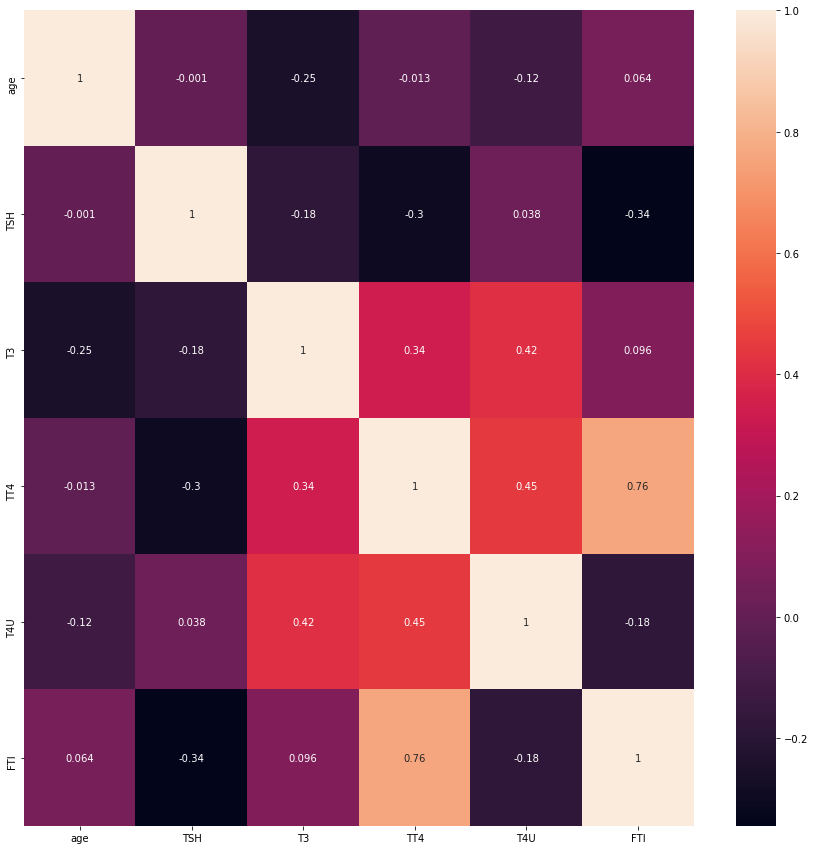

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)
plt.show()

In [27]:
#Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in categorical:
    mod = ols('binaryClass' + '~' + i, data = thyroid).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

              sum_sq      df         F   PR(>F)
sex         0.770651     1.0  12.37956  0.00044
Residual  219.438025  3525.0       NaN      NaN
                  sum_sq      df          F        PR(>F)
on_thyroxine    1.575721     1.0  25.405216  4.880409e-07
Residual      218.632955  3525.0        NaN           NaN
                        sum_sq      df         F    PR(>F)
query_on_thyroxine    0.000134     1.0  0.002143  0.963075
Residual            220.208542  3525.0       NaN       NaN
                               sum_sq      df         F    PR(>F)
on_antithyroid_medication    0.055703     1.0  0.891897  0.345028
Residual                   220.152973  3525.0       NaN       NaN
              sum_sq      df         F    PR(>F)
sick        0.013482     1.0  0.215831  0.642264
Residual  220.195194  3525.0       NaN       NaN
              sum_sq      df         F    PR(>F)
pregnant    0.099118     1.0  1.587353  0.207788
Residual  220.109558  3525.0       NaN       NaN
             

From Anova test we get to know p value of features so we gonna drop those feature who have p value greater than 0.2

In [28]:
thyroid = thyroid.drop(['T4U','age','query_on_thyroxine','on_antithyroid_medication','sick','I131_treatment','query_hyperthyroid',
                        'lithium','tumor','hypopituitary','referral_source'],axis=1)

In [29]:
thyroid

,sex,on_thyroxine,pregnant,thyroid_surgery,query_hypothyroid,goitre,psych,TSH,T3,TT4,FTI,binaryClass
0,0,0,0,0,0,0,0,1.30,2.5,125.0,109.0,1
1,0,0,0,0,0,0,0,4.10,2.0,102.0,107.0,1
2,1,0,0,0,0,0,0,0.98,2.0,109.0,120.0,1
3,0,1,0,0,0,0,0,0.16,1.9,175.0,107.0,1
4,0,0,0,0,0,0,0,0.72,1.2,61.0,70.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0,0,0,0,0,0,0,1.40,2.0,103.0,107.0,1
3768,0,0,0,0,0,0,0,1.00,2.1,124.0,114.0,1
3769,0,0,0,0,0,0,0,5.10,1.8,112.0,105.0,1
3770,1,0,0,0,0,0,0,0.70,2.0,82.0,87.0,1


In [30]:
thyroid['binaryClass'].value_counts()

1    3291
0     236
Name: binaryClass, dtype: int64

# Here we can see that data is imbalance so we need to balance it

In [31]:
normal = thyroid[thyroid['binaryClass']==1]
disease = thyroid[thyroid['binaryClass']==0]
print(normal.shape)
print(disease.shape)
normal_sample = normal.sample(n=236)
print(normal_sample.shape)

(3291, 12)
(236, 12)
(236, 12)


In [32]:
new_thyroid = pd.concat([normal_sample,disease],axis=0)
new_thyroid.head()

,sex,on_thyroxine,pregnant,thyroid_surgery,query_hypothyroid,goitre,psych,TSH,T3,TT4,FTI,binaryClass
1102,1,0,0,0,0,0,0,1.70,1.0,115.0,125.0,1
591,0,1,0,0,0,0,0,0.15,2.4,135.0,118.0,1
222,0,0,0,0,0,0,0,1.10,2.2,83.0,79.0,1
1579,0,1,0,0,0,0,0,2.80,2.0,103.0,107.0,1
3211,1,0,0,0,0,0,0,1.00,3.1,107.0,103.0,1


In [33]:
# Splitting into features and target
X = new_thyroid.drop('binaryClass',axis=1)
y = new_thyroid[['binaryClass']]

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Logistic Regression

In [35]:
lr = LogisticRegression()
prediction_lr = lr.fit(X_train,y_train).predict(X_test)
print(f'Accuracy using logistic regression is {accuracy_score(y_test,prediction_lr)*100} %')

Accuracy using logistic regression is 98.94736842105263 %


# Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier()
prediction_dt = dt.fit(X_train,y_train).predict(X_test)
print(f'Accuracy using Decision Tree is {accuracy_score(y_test,prediction_dt)*100} %')

Accuracy using Decision Tree is 98.94736842105263 %


# Random Forest Classifier

In [37]:
rf = RandomForestClassifier()
prediction_rf = rf.fit(X_train,y_train).predict(X_test)
print(f'Accuracy using Random Forest is {accuracy_score(y_test,prediction_rf)*100} %')

Accuracy using Random Forest is 98.94736842105263 %


# Support Vector Classifier

In [38]:
svm = SVC(kernel='linear',C=1,gamma=1)
prediction_svm = svm.fit(X_train,y_train).predict(X_test)
print(f'Accuracy using Support Vector Classifier is {accuracy_score(y_test,prediction_svm)*100} %')

Accuracy using Support Vector Classifier is 98.94736842105263 %


# Hyperparameter Optimization

In [39]:
# Applying Randomized Search CV on Random Forest
param_grid = {
    'n_estimators' : list(range(100,200,2)),
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : list(range(1,10,2)),
    'min_samples_leaf' : list(range(1,10,2)),
    'max_depth' : list(range(1,10,2))
}

rsc_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2)
rsc_rf_prediction = rsc_rf.fit(X_train,y_train).predict(X_test)
print(f'Accuracy after applying hyperparameter tunning on random forest is {accuracy_score(y_test,rsc_rf_prediction)}')
print(rsc_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=172; total time=   0.1s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=172; total time=   0.1s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=172; total time=   0.1s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=172; total time=   0.1s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=9, n_estimators=172; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=190; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=190; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=190; total time=   0.1s
[C

In [40]:
# Applying Randomized Search CV on Decision Tree 
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'min_samples_split' : list(range(1,10,2)),
    'min_samples_leaf' : list(range(1,10,2))
}

rsc_dt = RandomizedSearchCV(dt ,param_distributions=param_grid,n_iter=10,cv=5,verbose=2)
rsc_dt_prediction = rsc_dt.fit(X_train,y_train).predict(X_test)
print(f'Accuracy after applying hyperparameter tunning on Decision Tree is {accuracy_score(y_test,rsc_dt_prediction)}')
print(rsc_dt.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini,

In [42]:
filename = 'Thyroid Disease Detection.pkl'
pickle.dump(rsc_dt,open(filename,'wb'))